## Project 4: Hacking Food & Nutrition - Bengal Code
Team Zilberman



Target States in India: Tamil Nadu, West Bengal
Key: Comparison across two states

Goals:

In this project we will identify the food demand systems and nutritional systems within the populations of two regions in India: Bengal (West Bengal) and Tamil Nadu. Both of these regions suffer from nutritional inadequacy as there has been recently an emphasis on the quantity of food produced (large scale cash crops), rather than diverse nutritional quality. We will assess which nutrients are most lacking in each population and propose policies that will foster a healthier and more sustainable food supply, all while considering food prices, household budgets, and other household characteristics within these populations.



# Import Data Libraries


!pip install -r requirements.txt
import cfe

cfe.Result?
import pandas as pd 
from cfe.df_utils import to_dataframe

import ipywidgets
from ipywidgets import interactive, fixed, interact, Dropdown
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

import fooddatacentral as fdc

# For West Bengal


## A. [A] Estimate Demand System

An instance `r` of `cfe.Result` can be made persistent with
`r.to_dataset('my_result.ds')`, which saves the instance &ldquo;on disk&rdquo; in
[NetCDF format](https://en.wikipedia.org/wiki/NetCDF), and can be loaded using `cfe.from_dataset`.  We use
this method below to load data and demand system estimated from the
Indian ICRISAT data:



In [4]:
#reading results in from previous data
r = cfe.from_dataset('./bengali_t_2.ds',engine='netcdf4')
r

<xarray.Result>
Dimensions:           (i: 77, k: 19, t: 1, m: 1, j: 6315, kp: 19)
Coordinates:
  * i                 (i) object 'apple' ... 'wheat/atta - other sources'
  * k                 (k) object 'Males 0-1' 'Males 1-5' ... 'log Hsize'
  * t                 (t) int64 1
  * m                 (m) int64 1
  * j                 (j) object '419101101' '419101102' ... '727892301'
  * kp                (kp) object 'Males 0-1' 'Males 1-5' ... 'log Hsize'
Data variables: (12/20)
    alpha             float64 nan
    beta              (i) float64 0.496 0.3707 0.4779 ... 0.2675 0.0964 0.1855
    delta             (k, i) float64 0.1401 -0.2878 0.02118 ... 0.6944 0.3445
    prices            (i, t, m) float64 104.7 98.68 17.11 ... 71.91 6.692 22.15
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 ... 1.386 0.6931 1.946
    loglambdas        (j, t, m) float64 -0.6023 0.8258 1.071 ... -1.476 -0.1362
    ...                ...
    se_beta           float64 nan
    se_alpha          float64 nan
    se_a              (i, t, m) float64 0.01903 0.03035 ... 0.01467 0.01299
    y                 (i, j, t, m) float64 4.317 4.248 nan nan ... nan nan nan
    logp              (i, t, m) float64 4.651 4.592 2.84 ... 4.275 1.901 3.098
    z                 (k, j, t, m) float64 0.0 0.0 0.0 ... 1.386 0.6931 1.946
Attributes:
    firstround:            1
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

## Interpreting Parameters

### $\alpha$:
higher $\alpha$, larger share in total food expenditure

- more luxry items, such as cooked meals and liquor, constitute a higher proportion in food expenditure 
- goods like spices (tumeric, salt, chillies, ginger) intuitively have smaller alphas 


In [5]:
# alpha sorted in descending order 
r.get_alpha(as_df=True).dropna().sort_values(ascending=False)

i
lpg                     5.234320
rice - other sources    5.023198
milk: liquid            4.882705
goat meat               4.818306
firewood & chips        4.753999
                          ...   
besan                   1.645212
dry chillies            1.590987
dhania                  1.472786
salt                    1.326400
oilseeds                1.218876
Name: alpha, Length: 77, dtype: float64

### $\beta$:
Income elasticity parameter

- how sensitive demand for a good is compared to changes in other economic factors, such as price or income
- higher beta, more elastic, more demanded when food budget is higher

In [6]:
r.get_beta(as_df=True).dropna().sort_values(ascending=False)

i
pickles                 0.751800
dates                   0.573696
orange,mausami          0.512298
curd                    0.499519
apple                   0.496006
                          ...   
mustard oil             0.124608
wheat/atta - P.D.S.     0.096397
potato                  0.093016
muri                    0.079579
rice - other sources    0.067727
Name: beta, Length: 77, dtype: float64

### $\delta$:
Effect of household characteristic on demand 

In [7]:
to_dataframe(r.delta).unstack('k')

k,Males 0-1,Males 1-5,Males 5-10,Males 10-15,Males 15-20,Males 20-30,Males 30-50,Males 50-60,Males 60-100,Females 0-1,Females 1-5,Females 5-10,Females 10-15,Females 15-20,Females 20-30,Females 30-50,Females 50-60,Females 60-100,log Hsize
i,,,,,,,,,,,,,,,,,,,
apple,0.140054,-0.007784,-0.030235,0.067374,-0.011472,0.002477,-0.012606,0.103066,0.212665,-0.264834,0.032922,-0.007987,0.044757,-0.038309,0.174866,0.263484,0.114062,0.204580,-0.067697
arhar (tur),-0.287830,0.246268,0.250741,0.172021,0.356639,0.252322,0.196279,0.163880,0.088135,-0.308011,0.154856,0.150971,0.146467,0.172516,0.148634,-0.040523,0.221362,0.011917,-0.098210
banana,0.021184,0.015974,0.000388,0.013626,-0.039526,0.031326,0.092942,0.177143,0.222820,-0.162653,-0.062048,-0.015986,-0.003951,0.001248,0.021501,0.064457,0.083629,0.142937,0.120031
besan,0.026619,-0.007839,0.014966,0.031989,0.049018,0.068661,0.054182,0.162958,0.083755,0.098120,-0.033183,-0.018437,0.007424,0.039843,0.052130,0.109855,0.134904,0.024216,0.350544
black pepper,0.150579,0.093137,-0.024558,0.112120,0.127869,0.090231,0.013454,0.025392,0.092368,-0.038844,0.086744,0.009830,0.030404,0.024502,-0.002596,0.054639,0.093476,0.170520,0.144662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tomato,-0.102729,-0.013199,0.009855,0.025858,0.011730,0.058775,0.111590,0.136450,0.164900,-0.117048,-0.044966,0.003451,-0.002357,0.010449,0.063016,0.071056,0.081072,0.031568,0.326630
turmeric,-0.101660,-0.110070,-0.031389,-0.050036,-0.040818,-0.013583,0.039161,0.056210,0.058252,-0.182901,-0.109768,-0.067095,-0.025956,-0.017790,0.025037,0.028303,0.023051,-0.009568,0.575886
urd,0.113748,0.111208,0.047185,0.109537,0.156272,0.169190,0.154355,0.078008,0.048054,-0.341310,0.103046,0.131021,0.089356,0.101879,0.101286,0.149827,0.066350,0.072795,0.029730


The triple of parameters $(\alpha,\beta,\delta)$ completely describes the demand system and the corresponding utility function (over the goods we observe).

## Demands



As mentioned above, we&rsquo;ve estimated the parameters of a Frischian demand system (demands that depend on prices and the households marginal utility of expenditures). But we can *compute* the corresponding Marshallian (depends on prices and budget) or Hicksian (depends on prices and the level of utility) demands for this same population, using the `cfe.Result.demands` method.  

Let&rsquo;s compute Marshallian demands.  Start with a choice of budget $x$ and prices.


In [8]:
t=1
m=1

x = r.get_predicted_expenditures().sum('i')
median_x = x.where(x>0).sel(t=t,m=m).median('j') # Budget (median household)

# Note selection of prices for West Bengal
p = r.prices.sel(t=t,m=m).fillna(1).copy()

p.to_dataframe().fillna(1).squeeze()
p_df = p.to_dataframe().fillna(1).squeeze()

We have check the reliability of our estimated prices with respect to actual market price. 

In [9]:
# showing prices for all goods in descending order
with pd.option_context('display.max_rows', None,):
    print(p_df.sort_values(by = 'prices', ascending=False))

                                                  t  m      prices
i                                                                 
cashewnut                                         1  1  512.648542
chips                                             1  1  378.665218
ghee                                              1  1  350.717436
black pepper                                      1  1  345.478186
goat meat                                         1  1  337.442721
milk : condensed/ powder                          1  1  306.236706
raisin (kishmish, monacca etc.)                   1  1  249.711817
jeera                                             1  1  228.647633
tea : leaf                                        1  1  224.229596
curry powder                                      1  1  210.048233
sauce, jam, jelly                                 1  1  203.606133
other spices                                      1  1  199.797117
turmeric                                          1  1  185.63

Now compute expenditures on different items.  The object `r` already knows what the estimated
parameters are, and uses those automatically:



In [10]:
c=r.demands(median_x,p)
c

i
apple                         1.139272
arhar (tur)                   0.895567
banana                        1.691590
besan                         0.555090
black pepper                  0.325739
                                ...   
tomato                        1.033891
turmeric                      0.710354
urd                           0.842605
wheat/atta - P.D.S.           1.138226
wheat/atta - other sources    1.320910
Name: quantities, Length: 77, dtype: float64

In [11]:
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('ggplot')

Now we can trace out demands for a household with median budget but
varying prices of (say) coconuts (holding other prices fixed):



The `graph_demand` function takes in a food name and generate the demand curves for this good; each curve represent the demand for household of varying budget level with respect to the median budget. 

**Input Parameters:**

- **food**: a string (any food name from the xhat df columns)


In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [22]:
def graph_demand(product): 
# Values for prices
    ref_price = r.prices.sel(i=product,t=t,m=m)
    P = np.linspace(ref_price/5,ref_price*5,50)

    def my_prices(p0,p=p,i=product):
        p = p.copy()
        p.loc[i] = p0*p.sel(i=i)
        return p

    for myx in [median_x*s for s in [.25,.5,1.,2,4]]:
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore')
            plt.plot([r.demands(myx,my_prices(p0))[product] for p0 in P],P)
    plt.legend(['1/4 of median budget', '1/2 of median budget','median budget', 
                '2 x median budget', '4 x median budget'],bbox_to_anchor=(1.05, 1),loc='upper left')
    plt.title(f"Demand Curves for {product}")
    plt.xlabel("%s in Kgs" % product)
    plt.ylabel('Price Scale')    
    plt.show()

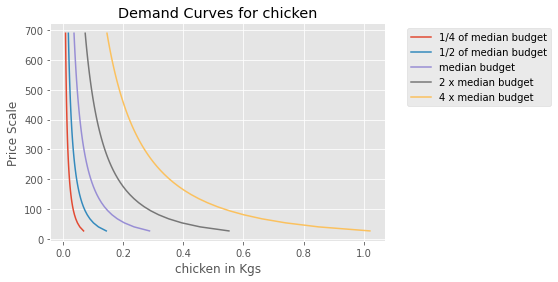

In [21]:
#example 
graph_demand('chicken')

In [23]:
#interactive presentation of demand for all products 
#this step will take some time to run and respond 
all_good = p_df.sort_values(by = 'prices', ascending=False).index

interact(graph_demand, product = all_good)

interactive(children=(Dropdown(description='product', options=('cashewnut', 'chips', 'ghee', 'black pepper', '…

<function __main__.graph_demand(product)>

The `graph_engel` function takes in a food name and generate an Engel's Law graph to demonstrate the relationship between total food expenditure and expenditure on a sigle food 

**Input Parameters:**

- **food**: a string (any food name from the xhat df columns)


In [24]:
def graph_engel(product):
    # Values for prices
    ref_price = r.prices.sel(i=product,t=t,m=m)

    # Range of budgets to consider
    X = np.linspace(median_x/10,median_x*10,50)

    plt.plot(X,[r.demands(x,ref_price)[product] for x in X])
    plt.title(f"Engel's Curve for {product}")
    plt.ylabel("%s in Kgs" % product)
    plt.xlabel('Budget in Rupee')
    plt.show()

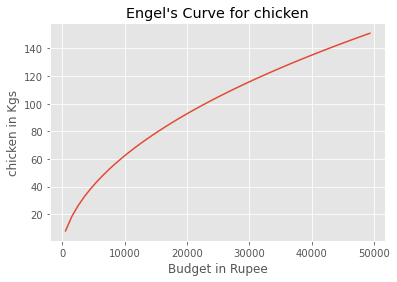

In [26]:
#example 
graph_engel('chicken')

## B. [A] Nutritional Adequacy

In [27]:
# Reference budget (find mean in reference period & market):
reference_x = r.get_predicted_expenditures().mean('j').sum('i').sel(t=t,m=m)

p = r.prices.sel(t=t,m=m,drop=True)
p = p.to_dataframe('i').squeeze().dropna()
p

i
apple                         104.693121
arhar (tur)                    98.678479
banana                         17.112447
besan                          46.824860
black pepper                  345.478186
                                 ...    
tomato                         21.596503
turmeric                      185.630514
urd                            71.913813
wheat/atta - P.D.S.             6.692056
wheat/atta - other sources     22.154218
Name: i, Length: 77, dtype: float64

### Nutritional Needs of Households
Our data on demand and nutrients is at the *household* level; we
   can&rsquo;t directly compare household level nutrition with individual
   level requirements.  What we **can** do is add up minimum individual
   requirements, and see whether household total exceed these.  This
   isn&rsquo;t a guarantee that all individuals have adequate nutrition
   (since the way food is allocated in the household might be quite
   unequal, or unrelated to individual requirements), but it is
   *necessary* if all individuals are to have adequate nutrition.

For the average household in West Bengal, the number of
different kinds of people can be computed by averaging over households:


In [28]:
# In first round, averaged over households

zbar = r.z.sel(t=r.firstround,drop=True).mean(['j','m'])[:-1].squeeze() # Leave out log HSize

zbar = zbar.to_dataframe().squeeze()
#on average, there's 3.66 individuals in a household in West Bengal
zbar.sum()

4.105146476642914

Now, the inner/dot/matrix product between `zbar` and the `rda`DataFrame of requirements will give us minimum requirements for the average household:

In [29]:
DRIs = pd.read_csv('Dietary Requirements - diet_minimums.csv')
# Define *minimums*
diet_min = DRIs.set_index('Nutrition')

In [30]:
new_df = pd.DataFrame(index = diet_min.index)
new_df['Males 0-1'] =  diet_min['C 1-3'].to_list()
new_df['Females 0-1'] = diet_min['C 1-3'].to_list()
new_df['Males 1-5'] =  (np.array(diet_min['C 1-3']) + np.array(diet_min['M 4-8'])) / 2
new_df['Females 1-5'] =  (np.array(diet_min['C 1-3']) + np.array(diet_min['F 4-8'])) / 2
new_df['Males 5-10'] =  (np.array(diet_min['M 4-8']) + np.array(diet_min['M 9-13'])) / 2
new_df['Females 5-10'] =  (np.array(diet_min['M 4-8']) + np.array(diet_min['M 9-13'])) / 2
new_df['Males 10-15'] =  (np.array(diet_min['M 9-13']) + np.array(diet_min['M 14-18'])) / 2
new_df['Females 10-15'] =  (np.array(diet_min['F 9-13']) + np.array(diet_min['F 14-18'])) / 2
new_df['Males 15-20'] =  np.array(diet_min['M 14-18'])
new_df['Females 15-20'] =  np.array(diet_min['F 14-18'])
new_df['Males 20-30'] =  np.array(diet_min['M 19-30'])
new_df['Females 20-30'] =  np.array(diet_min['F 19-30'])
new_df['Males 30-50'] =  np.array(diet_min['M 31-50'])
new_df['Females 30-50'] =  np.array(diet_min['F 31-50'])
new_df['Males 50-60'] =  np.array(diet_min['M 51+'])
new_df['Males 60-100'] =  np.array(diet_min['M 51+'])
new_df['Females 50-60'] =  np.array(diet_min['F 51+'])
new_df['Females 60-100'] =  np.array(diet_min['F 51+'])
rda = new_df

In [31]:
#check if all age-sex range is label correctly in rda and zbar
rda.columns.difference(zbar.index)

Index([], dtype='object')

In [32]:
# May need to tweak types or alignment to match RDA and zbar types:
rda0,zbar0=rda.align(zbar,axis=1)

# This matrix product gives minimum nutrient requirements for average
# household 
hh_rda = rda0.replace('',0)@zbar0

# RDA is /daily/, but  demands in our data are /monthly/:
hh_rda = hh_rda*30
hh_rda

Nutrition
Energy                            233313.539192
Protein                             5611.646081
Fiber, total dietary                3266.389549
Folate, DFE                        45267.339667
Calcium, Ca                       132438.954869
Carbohydrate, by difference        16010.071259
Iron, Fe                            1374.957245
Magnesium, Mg                      40705.961995
Niacin                              1713.244656
Phosphorus, P                      98840.593824
Potassium, K                      560811.163895
Riboflavin                           135.364608
Thiamin                              130.338242
Vitamin A, RAE                     90688.598575
Vitamin B-12                         271.604038
Vitamin B-6                          153.304988
Vitamin C, total ascorbic acid      8730.047506
Vitamin E (alpha-tocopherol)        1692.287411
Vitamin K (phylloquinone)          11145.581948
Zinc, Zn                            1094.605701
dtype: float64

### Nutritional Adequacy of Food Demands

#### Food Conversion Table
As usual, we need data to convert foods to nutrients:


In [33]:
fdc_codes = pd.read_csv('proj_4_fdc_codes_bengal.csv - Sheet1.csv').set_index('Item')
fdc_codes = fdc_codes.reset_index()
fdc_codes['Item'].tolist()

['apple',
 'arhar (tur)',
 'banana',
 'besan',
 'black pepper',
 'bread (bakery)',
 'brinjal',
 'cabbage',
 'carrot',
 'cashewnut',
 'cauliflower',
 'chicken',
 'chillis (green)',
 'chips',
 'coconut',
 'cold beverages: bottled/canned',
 'curd',
 'curry powder',
 'dates',
 'dhania',
 'dry chillies',
 'fish (fresh)',
 'french beans and barbati',
 'garlic',
 'ghee',
 'ginger',
 'goat meat',
 'gourd, pumpkin',
 'grapes',
 'groundnut',
 'groundnut oil',
 'guava',
 'gur',
 'jeera',
 "lady's finger",
 'lemon',
 'maida',
 'mango',
 'masur',
 'milk : condensed/ powder',
 'milk: liquid',
 'moong',
 'muri',
 'mustard oil',
 'oilseeds',
 'onion',
 'orange,mausami',
 'other spices',
 'palak',
 'parwal/patal',
 'peas-pulses',
 'pickles',
 'potato',
 'radish',
 'raisin (kishmish, monacca, etc.)',
 'refined oil [sunflower, soyabean, saffola, etc.]',
 'rice - other sources',
 'salt',
 'sauce, jam, jelly',
 'sugar -other sources',
 'suji, rawa',
 'tamarind',
 'tea: cups',
 'tea; leaf',
 'tomato',
 'tur

In [34]:
import fooddatacentral as fdc

apikey = 'CDXgPa1HVqJab8EFllem1ikOF75m2ELYwziKtICr'
D = {}
count = 0
for food in fdc_codes.Item.tolist():
    try:
        FDC = fdc_codes.loc[fdc_codes.Item==food,:].ID[count]
        count+=1
        print(FDC)
        D[food] = fdc.nutrients(apikey,FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food,FDC))        

D = pd.DataFrame(D,dtype=float).fillna(0)

D

1102644
1977550
1102653
2091506
170931
1100621
2024758
1103343
1103193
1100517
1103345
2029648
170497
1648089
1100523
422335
1919204
1155520
1102631
170922
168570
1028841
2216557
1103354
1103844
1937534
175304
168448
1102665
1100536
1750348
1102666
1942595
1915741
2008520
1102594
2091229
1102670
172420
508611
1909132
1100404
1886719
172337
598232
1103364
1102597
1889171
1103153
168414
170419
1103686
1102879
1103374
1102640
2129576
2077766
173468
2031743
1103933
1126152
1102697
1104274
1104262
1103276
172231
1898206
522973


,apple,arhar (tur),banana,besan,black pepper,bread (bakery),brinjal,cabbage,carrot,cashewnut,...,"sauce, jam, jelly",sugar -other sources,"suji, rawa",tamarind,tea: cups,tea; leaf,tomato,turmeric,urd,wheat/atta - other sources
Alanine,0.00,0.0,0.00,0.0,0.616,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.33,0.0,0.0
"Alcohol, ethyl",0.00,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Amino acids,0.00,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Arginine,0.00,0.0,0.00,0.0,0.308,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.54,0.0,0.0
Ash,0.00,0.0,0.00,0.0,4.490,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,7.08,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamin K (Menaquinone-4),0.00,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Vitamin K (phylloquinone),2.20,0.0,0.50,0.0,163.700,0.20,0.0,38.20,13.20,36.80,...,0.0,0.00,0.0,2.8,0.00,0.00,7.90,13.40,0.0,0.0
Vitamins and Other Components,0.00,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Water,85.56,0.0,74.91,0.0,12.460,35.70,0.0,90.39,88.29,1.64,...,0.0,0.02,0.0,31.4,99.70,99.93,94.52,12.85,0.0,0.0


In [35]:
#transpose and reformat
fct = D.T

### Nutrient Demand
We can also use our demand functions to compute nutrition as a *function* of prices and budget.



In [36]:
import warnings 

def my_prices(p0,p=p,i='apple'):
    """
    Set price of good i to p0, holding remaining prices fixed at values in p.
    """
    p = p.copy()
    p.loc[i] = p0
    return p.squeeze()

# x is income, p is a vector of prices 
def nutrient_demand(x,p):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        c = r.demands(x,p)
    
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

With this `nutrient_demand` function in hand, we can see how nutrient outcomes vary with budget, given prices:

The `nut_vs_budget` function takes in a list of nutrient and see how nutrient outcomes vary with budget

**Input Parameters:**

- **nutrient**: a list of string of nutrient names
- **budget**: a reference x; we assume the median by defalt 


In [38]:
def nut_vs_budget(nutrient, budget):
    X = np.linspace(budget/5,budget*5,50)

    df = pd.concat({myx:np.log(nutrient_demand(myx,p))[nutrient] for myx in X},axis=1).T
    ax = df.plot()
    plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
    
    ax.set_title('Nutrient Outcome v.s. Change in Budget')
    ax.set_xlabel('log budget in Rupee')
    ax.set_ylabel('log nutrient')

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(uf

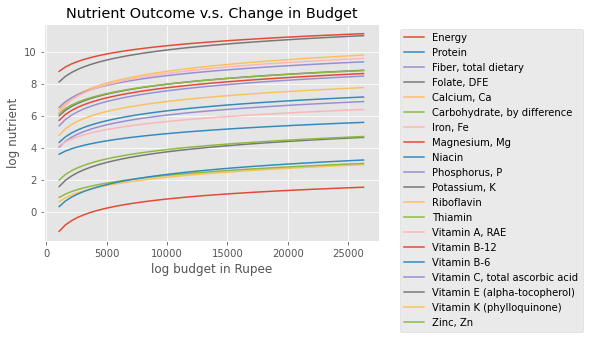

In [39]:
#example 
#all nutrients, median budget as reference budget 
AllNutrients = hh_rda.index.tolist()

nut_vs_budget(AllNutrients, budget = reference_x)

Now how does nutrition vary with prices?

The `nut_vs_prices` function takes in a list of nutrient and see how nutrient outcomes vary with changes in price for a specified food 

**Input Parameters:**

- **nutrient**: a list of string of nutrient names
- **budget**: a reference x; we assume the median by defalt 
- **good**: a specified food



In [40]:
def nut_vs_prices(nutrient, budget, good):
    ref_price = r.prices.sel(i=good,t=t,m=m,drop=True)
    P = np.linspace(1,5,20).tolist()
    ndf = pd.DataFrame({p0:np.log(nutrient_demand(budget,my_prices(p0,i=good)))[nutrient] for p0 in P}).T

    ax = ndf.plot()
    
    ax.set_title(f"Nutrient Outcome v.s. Change in Price for {good}")
    ax.set_xlabel('log price in Rupee')
    ax.set_ylabel('log nutrient')


/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(uf

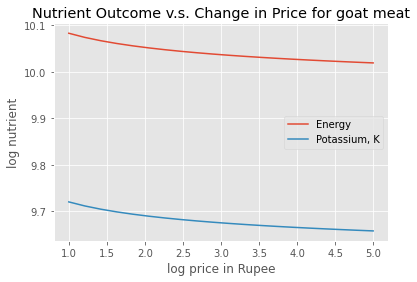

In [41]:
# example:
#goat meat; energy and potassium 

KeyNutrients = ['Energy','Potassium, K']
nut_vs_prices(KeyNutrients, reference_x, 'goat meat')


### Nutritional Adequacy

Since we can trace out demands for nutrients as a function of $(x,p)$, and we&rsquo;ve computed minimum nutritional requirements for the average household, we can *normalize* nutritional intake to check the adequacy of diet.

In [42]:
def nutrient_adequacy_ratio(x,p):
    return nutrient_demand(x,p)/(hh_rda/30)

In terms of normalized nutrients, any household with more than one
unit of any given nutrient (or zero in logs) will be consuming a
minimally adequate level of the nutrient; below this level there&rsquo;s
clearly nutritional inadequacy.  For this reason the ratio of
actual nutrients to required nutrients is termed the &ldquo;nutrient
adequacy ratio,&rdquo; or NAR.



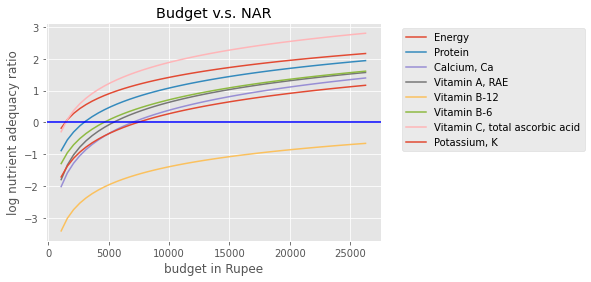

In [43]:
X = np.linspace(reference_x/5,reference_x*5,50)

UseNutrients = ['Energy',
                'Protein',
                'Calcium, Ca',
                'Vitamin A, RAE',
 'Vitamin B-12',
 'Vitamin B-6',
 'Vitamin C, total ascorbic acid',
'Potassium, K']

ndf = pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T


ax = ndf.plot()
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
ax.set_title('Budget v.s. NAR')
ax.set_xlabel('budget in Rupee')
ax.set_ylabel('log nutrient adequacy ratio')
ax.axhline(0, color = 'b')
ndf.plot

As before, we can also vary relative prices.  Here we trace out nutritional adequacy varying the price of a single good:

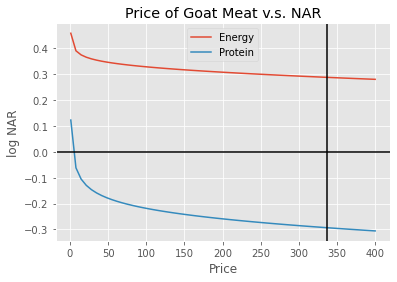

In [45]:
poorer_x = reference_x/2.5

good = 'goat meat'

ExNutrients = ['Energy', 'Protein']

Pscale = np.linspace(1,400,60).tolist()

log_nar = {s0:np.log(nutrient_adequacy_ratio(poorer_x,my_prices(s0,p,i=good)))[ExNutrients] for s0 in Pscale}

log_nar = pd.DataFrame(log_nar).T

ax = log_nar.plot(ylabel='log NAR',xlabel='Price')
ax.set_title("Price of Goat Meat v.s. NAR")

ax.axhline(0, color = 'k')
ax.axvline(p[good],color = 'k')

#vertical line atural price of good 
#horizontal line: if you are above, you have adequate nutrition 

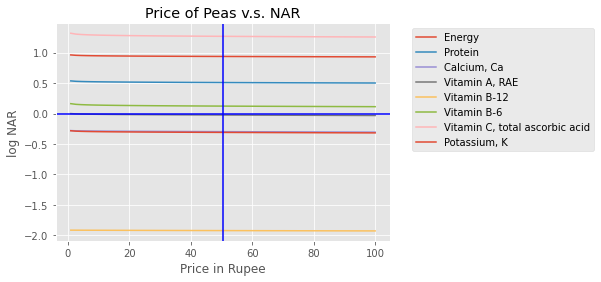

In [47]:
#for median Income
poorer_x = reference_x

good = 'peas-pulses'

ExNutrients = ['Energy', 'Protein']

Pscale = np.linspace(1,100,60).tolist()

log_nar = {s0:np.log(nutrient_adequacy_ratio(poorer_x,my_prices(s0,p,i=good)))[UseNutrients] for s0 in Pscale}

log_nar = pd.DataFrame(log_nar).T

ax = log_nar.plot(ylabel='log NAR',xlabel='Price in Rupee')
ax.set_title("Price of Peas v.s. NAR")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')

ax.axhline(0, color = 'b')
ax.axvline(p[good], color = 'b')

#vertical line atural price of good 
#horizontal line: if you are above, you have adequate nutrition 

## C. [C] Value of Technical Innovation

Innovation: 
Aim: Increase the amount of Vitamin B-12 in peas & pulses (to 6 milligrams)


In [54]:
#technological innovation
#resetting the vitamin b-12 value 
fct.loc['peas-pulses','Vitamin B-12'] = 6

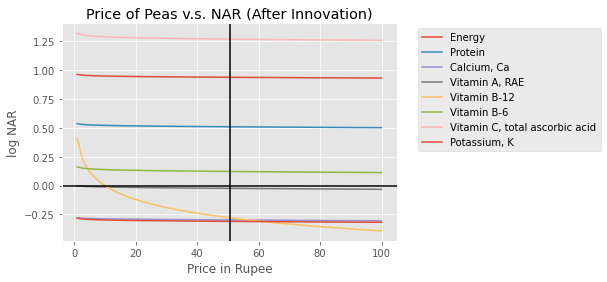

In [55]:
#for median Income: after technological innovation  
poorer_x = reference_x

good = 'peas-pulses'

ExNutrients = ['Energy', 'Protein']

Pscale = np.linspace(1,100,60).tolist()

log_nar = {s0:np.log(nutrient_adequacy_ratio(poorer_x,my_prices(s0,p,i=good)))[UseNutrients] for s0 in Pscale}

log_nar = pd.DataFrame(log_nar).T

ax = log_nar.plot(ylabel='log NAR',xlabel='Price in Rupee')
ax.set_title("Price of Peas v.s. NAR (After Innovation)")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')

ax.axhline(0, color = 'k')
ax.axvline(p[good], color = 'k')

#vertical line atural price of good 
#horizontal line: if you are above, you have adequate nutrition 

Now without changing the price of peas, the Vitamin B-12 NAR curve intersects with the 0 line (indicating nutritional dequacy) and the vertical line representing the actual price. 